In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import aus GitHub
url="https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv"
df_raw = pd.read_csv(url, sep=None)

df_raw.info()
df_raw.head(5)

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_16235/3409098883.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_raw = pd.read_csv(url, sep=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [65]:
#Verteilung Alter der Männer und Frauen
df_raw["final_sec"] = pd.to_timedelta(df_raw["final"]).dt.total_seconds()
df_raw["split_sec"] = pd.to_timedelta(df_raw["split"]).dt.total_seconds()

df_filtered_men = df_raw[df_raw["gender"].str.contains("M")]
df_filtered_woman = df_raw[df_raw["gender"].str.contains("W")]

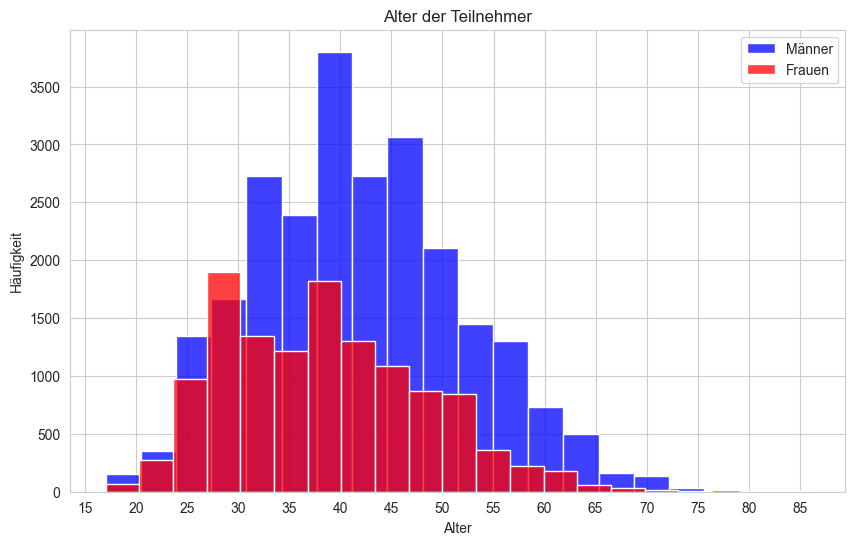

In [66]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_men["age"], bins=20,kde=False, color="blue", label="Männer")
sns.histplot(df_filtered_woman["age"], bins=20,kde=False, color="red", label="Frauen")

# Achsenbeschriftung und Titel
plt.xlabel("Alter")
plt.xticks(range(15, 90, 5))
plt.ylabel("Häufigkeit")
plt.title("Alter der Teilnehmer")

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

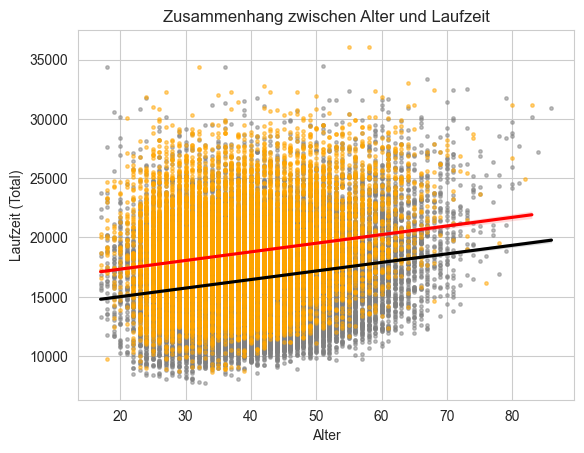

In [67]:

#df_filtered_men["final_sec"] = pd.to_timedelta(df_filtered_men["final"]).dt.total_seconds()

sns.regplot(data=df_filtered_men, x="age", y="final_sec", scatter_kws={"alpha": 0.5, "color": "grey", "s": 6}, line_kws={"color": "black"})
sns.regplot(data=df_filtered_woman, x="age", y="final_sec", scatter_kws={"alpha": 0.5, "color": "orange", "s": 6}, line_kws={"color": "red"})
plt.xlabel("Alter")
plt.ylabel("Laufzeit (Total)")
plt.title("Zusammenhang zwischen Alter und Laufzeit")
plt.show()

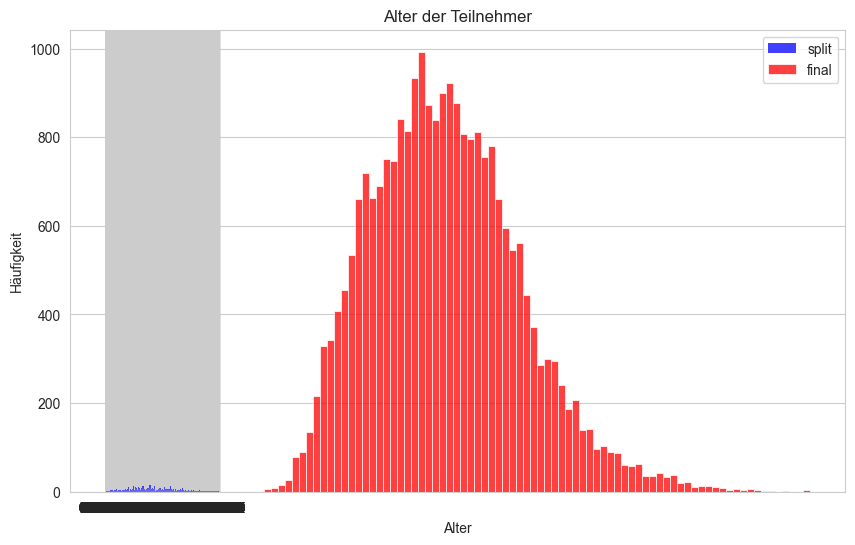

In [69]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_men["split"],kde=False, color="blue", label="split")
sns.histplot(df_filtered_men["final_sec"],kde=False, color="red", label="final")

# Achsenbeschriftung und Titel
plt.xlabel("Alter")
plt.ylabel("Häufigkeit")
plt.title("Alter der Teilnehmer")

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()